d-sandbox

<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://databricks.com/wp-content/uploads/2018/03/db-academy-rgb-1200px.png" alt="Databricks Learning" style="width: 1200px">
</div>

# Capstone Project

You will work in small teams (2-3 people) to do the following:

0. Load in a dataset from `databricks-datasets`, [UCI ML Repository](https://archive.ics.uci.edu/ml/index.php), [Kaggle](https://www.kaggle.com/), or any other open-source dataset. 
0. Create a Delta Table
0. Build either:
  * Sklearn model, but apply it in parallel using a Pandas UDF
  * Build an MLlib model
0. Track model performance with MLflow
0. Present your notebook to the class and share any roadblocks you hit (~5 minutes)

Extras:
* Build a Databricks Dashboard
* Perform hyperparameter tuning

## ![Spark Logo Tiny](https://files.training.databricks.com/images/105/logo_spark_tiny.png) In this lesson you:<br>
 - Work in a small team to apply the skills you learned throughout the course to a new dataset

In [0]:
file_path = "dbfs:/FileStore/shared_uploads/ngaukahang@gmail.com/USvideos.csv"
df = spark.read.csv(file_path, header="true", inferSchema="true", multiLine="true", escape='"')

In [0]:
df.dtypes

Out[2]: [('video_id', 'string'),
 ('trending_date', 'string'),
 ('title', 'string'),
 ('channel_title', 'string'),
 ('category_id', 'int'),
 ('publish_time', 'timestamp'),
 ('tags', 'string'),
 ('views', 'int'),
 ('likes', 'int'),
 ('dislikes', 'int'),
 ('comment_count', 'int'),
 ('thumbnail_link', 'string'),
 ('comments_disabled', 'boolean'),
 ('ratings_disabled', 'boolean'),
 ('video_error_or_removed', 'boolean'),
 ('description\r', 'string')]

In [0]:
from pyspark.sql.functions import *
from pyspark.sql.functions import date_format

# extracting the information of year, month, quarter, and dayofweek from the column "publish_time"
df_date = df.withColumn("publish_year", year("publish_time").alias("year"))
df_date1 = df_date.withColumn("publish_month", month("publish_time").alias("month"))
df_date2 = df_date1.withColumn("publish_quarter", quarter("publish_time").alias("quarter"))
df_date3 = df_date2.withColumn("publish_dayofweek", dayofweek("publish_time").alias("dayofweek"))
df_date4 = df_date3.withColumn('publish_hour', date_format('publish_time', 'HH'))

In [0]:
display(df_date4.limit(5))

video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_year,publish_month,publish_quarter,publish_dayofweek,publish_hour
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000+0000,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,false,false,false,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,2017,11,4,2,17
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with John Oliver (HBO),LastWeekTonight,24,2017-11-13T07:30:00.000+0000,"""last week tonight trump presidency""|""last week tonight donald trump""|""john oliver trump""|""donald trump""",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,false,false,false,"One year after the presidential election, John Oliver discusses what we've learned so far and enlists our catheter cowboy to teach Donald Trump what he hasn't.\n\nConnect with Last Week Tonight online...\n\nSubscribe to the Last Week Tonight YouTube channel for more almost news as it almost happens: www.youtube.com/user/LastWeekTonight\n\nFind Last Week Tonight on Facebook like your mom would: http://Facebook.com/LastWeekTonight\n\nFollow us on Twitter for news about jokes and jokes about news: http://Twitter.com/LastWeekTonight\n\nVisit our official site for all that other stuff at once: http://www.hbo.com/lastweektonight",2017,11,4,2,07
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Lele Pons",Rudy Mancuso,23,2017-11-12T19:05:24.000+0000,"""racist superman""|""rudy""|""mancuso""|""king""|""bach""|""racist""|""superman""|""love""|""rudy mancuso poo bear black white official music video""|""iphone x by pineapple""|""lelepons""|""hannahstocking""|""rudymancuso""|""inanna""|""anwar""|""sarkis""|""shots""|""shotsstudios""|""alesso""|""anitta""|""brazil""|""Getting My Driver's License | Lele Pons""",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,false,false,false,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► https://www.youtube.com/channel/UC5jkXpfnBhlDjqh0ir5FsIQ?sub_confirmation=1\n\nTHANKS FOR WATCHING! LIKE & SUBSCRIBE FOR MORE VIDEOS!\n-----------------------------------------------------------\nFIND ME ON: \nInstagram | http://instagram.com/rudymancuso\nTwitter | http://twitter.com/rudymancuso\nFacebook | http://facebook.com/rudymancuso\n\nCAST: \nRudy Mancuso | http://youtube.com/c/rudymancuso\nLele Pons | http://youtube.com/c/lelepons\nKing Bach | https://youtube.com/user/BachelorsPadTv\n\nVideo 

In [0]:
import pandas as pd 

df_pd = df_date4.toPandas()

In [0]:
df_pd['text'] = df_pd['title']+df_pd['channel_title']+df_pd['tags']
df_pd.isnull().sum()

Out[6]: video_id 0
trending_date 0
title 0
channel_title 0
category_id 0
publish_time 0
tags 0
views 0
likes 0
dislikes 0
comment_count 0
thumbnail_link 0
comments_disabled 0
ratings_disabled 0
video_error_or_removed 0
description\r 570
publish_year 0
publish_month 0
publish_quarter 0
publish_dayofweek 0
publish_hour 0
text 0
dtype: int64

In [0]:
import nltk
from nltk.stem import *
nltk.download('punkt')
from nltk.tokenize import RegexpTokenizer
import pandas as pd
from tqdm.notebook import tqdm
tqdm.pandas()
from functools import reduce
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data] Unzipping tokenizers/punkt.zip.
/databricks/python/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
 from pandas import Panel

In [0]:
from nltk.corpus import stopwords
nltk.download('wordnet') 
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def process(line):
    return([wordnet_lemmatizer.lemmatize(t) for t in tokenizer.tokenize(line) if t not in stop_words])
    

tokenizer = RegexpTokenizer(r'\w+')
df_pd['tokens']=df_pd['text'].str.lower().apply(process)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Unzipping corpora/stopwords.zip.

In [0]:
def most_frequent(List): 
    counter = 0
    num = List[0] 
      
    for i in List: 
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
  
    return num
  
df_pd['most_common'] = df_pd['tokens'].apply(most_frequent)

df_pd.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description\r,publish_year,publish_month,publish_quarter,publish_dayofweek,publish_hour,text,tokens,most_common
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017,11,4,2,17,WE WANT TO TALK ABOUT OUR MARRIAGECaseyNeistat...,"[want, talk, marriagecaseyneistatshantell, mar...",want
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"""last week tonight trump presidency""|""last wee...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017,11,4,2,07,The Trump Presidency: Last Week Tonight with J...,"[trump, presidency, last, week, tonight, john,...",trump
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"""racist superman""|""rudy""|""mancuso""|""king""|""bac...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017,11,4,1,19,"Racist Superman | Rudy Mancuso, King Bach & Le...","[racist, superman, rudy, mancuso, king, bach, ...",mancuso
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"""rhett and link""|""gmm""|""good mythical morning""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,2017,11,4,2,11,Nickelback Lyrics: Real or Fake?Good Mythical ...,"[nickelback, lyric, real, fake, good, mythical...",nickelback
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"""ryan""|""higa""|""higatv""|""nigahiga""|""i dare you""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017,11,4,1,18,"I Dare You: GOING BALD!?nigahiga""ryan""|""higa""|...","[dare, going, bald, nigahiga, ryan, higa, higa...",dare


In [0]:
from collections import Counter
one = df_pd['most_common'].to_list()

rslt = pd.DataFrame(Counter(one).most_common(10),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

Frequency
Word 
makeup 725
late 340
cat 316
trailer 285
news 234
show 221
star 219
movie 207
react 200
black 193

In [0]:
def popular(List_1):
  first = rslt.index.to_list() 
  if List_1 in first:
    return True
  else:
    return False 

df_pd['popular_word'] = df_pd['most_common'].apply(lambda d: popular(d))

In [0]:
df_pd['popular_word'].value_counts()

Out[12]: False 38009
True 2940
Name: popular_word, dtype: int64

In [0]:
df_pd.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description\r,publish_year,publish_month,publish_quarter,publish_dayofweek,publish_hour,text,tokens,most_common,popular_word
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017,11,4,2,17,WE WANT TO TALK ABOUT OUR MARRIAGECaseyNeistat...,"[want, talk, marriagecaseyneistatshantell, mar...",want,False
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"""last week tonight trump presidency""|""last wee...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017,11,4,2,07,The Trump Presidency: Last Week Tonight with J...,"[trump, presidency, last, week, tonight, john,...",trump,False
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"""racist superman""|""rudy""|""mancuso""|""king""|""bac...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017,11,4,1,19,"Racist Superman | Rudy Mancuso, King Bach & Le...","[racist, superman, rudy, mancuso, king, bach, ...",mancuso,False
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"""rhett and link""|""gmm""|""good mythical morning""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,2017,11,4,2,11,Nickelback Lyrics: Real or Fake?Good Mythical ...,"[nickelback, lyric, real, fake, good, mythical...",nickelback,False
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"""ryan""|""higa""|""higatv""|""nigahiga""|""i dare you""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017,11,4,1,18,"I Dare You: GOING BALD!?nigahiga""ryan""|""higa""|...","[dare, going, bald, nigahiga, ryan, higa, higa...",dare,False


In [0]:
df_pd["popular_word"] = df_pd["popular_word"].astype(int)
df_pd["comments_disabled"] = df_pd["comments_disabled"].astype(int)
df_pd["ratings_disabled"] = df_pd["ratings_disabled"].astype(int)
df_pd["video_error_or_removed"] = df_pd["video_error_or_removed"].astype(int)
df_pd["publish_hour"] = df_pd["publish_hour"].astype(int)

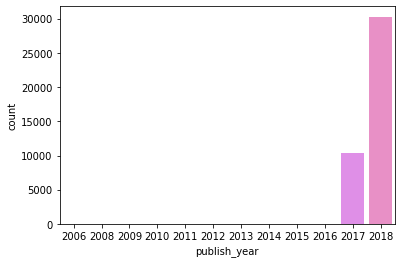

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.countplot(x=df_pd["publish_year"],data=df_pd)

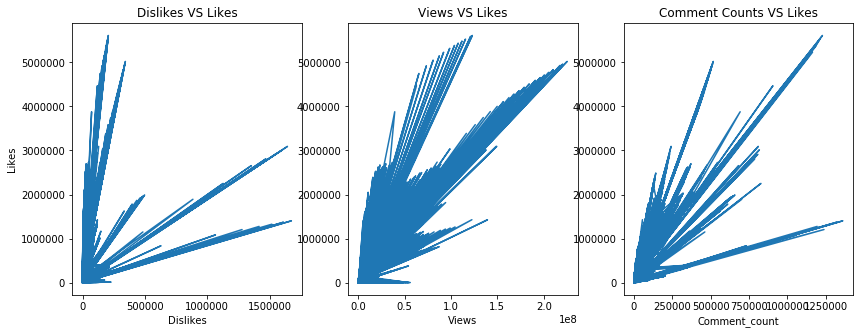

In [0]:
import numpy as np
import matplotlib.pyplot as plt

x1 = df_pd["dislikes"]
x2 = df_pd["views"]
x3 = df_pd["comment_count"]

y = df_pd["likes"]

plt.figure(figsize=(14,5))
plt.subplot(131)
plt.plot(x1, y)
plt.title('Dislikes VS Likes')
plt.xlabel('Dislikes')
plt.ylabel('Likes')

plt.subplot(132)
plt.plot(x2, y)
plt.title('Views VS Likes')
plt.xlabel('Views')

plt.subplot(133)
plt.plot(x3, y)
plt.title('Comment Counts VS Likes')
plt.xlabel('Comment_count')

plt.show()

In [0]:
df_pd[['dislikes','views','comment_count','likes']].corr()

,dislikes,views,comment_count,likes
dislikes,1.000000,0.472213,0.700184,0.447186
views,0.472213,1.000000,0.617621,0.849177
comment_count,0.700184,0.617621,1.000000,0.803057
likes,0.447186,0.849177,0.803057,1.000000


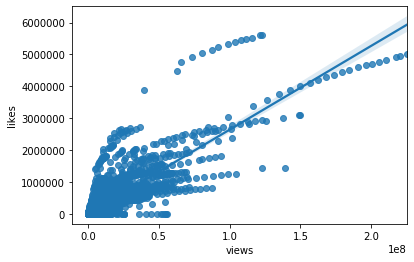

In [0]:
# draw regplot 
sns.regplot(x = "views",  
            y = "likes",  
            data = df_pd) 
  
# show the plot 
plt.show()

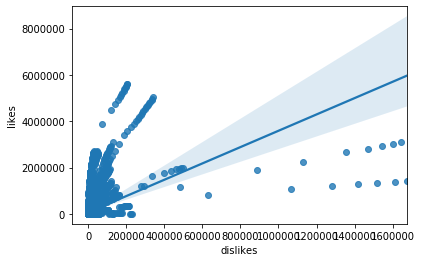

In [0]:
sns.regplot(x = "dislikes",  
            y = "likes",  
            data = df_pd) 
  
# show the plot 
plt.show()

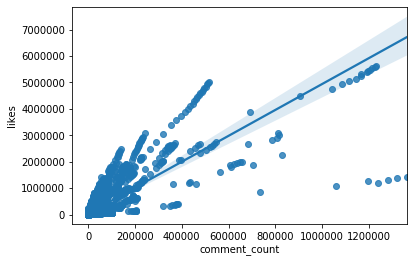

In [0]:
sns.regplot(x = "comment_count",  
            y = "likes",  
            data = df_pd) 
  
# show the plot 
plt.show()

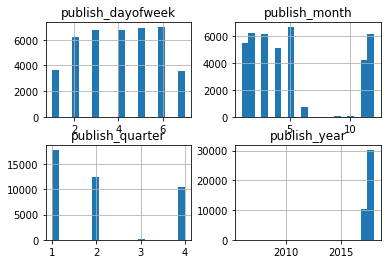

In [0]:
import matplotlib.pyplot as plt

# conducting some visulization on the distrubtion of 'year', 'month', 'quarter', and 'dayofweek'
plt.clf()
df_pd.hist(column=["publish_year","publish_month","publish_quarter","publish_dayofweek"], bins=20)
plt.show()

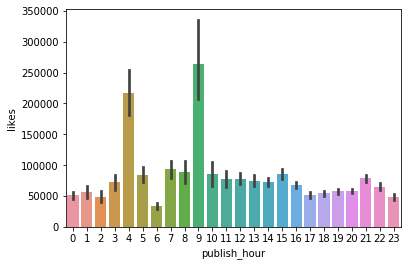

In [0]:
sns.barplot(x="publish_hour", y="likes", data=df_pd)

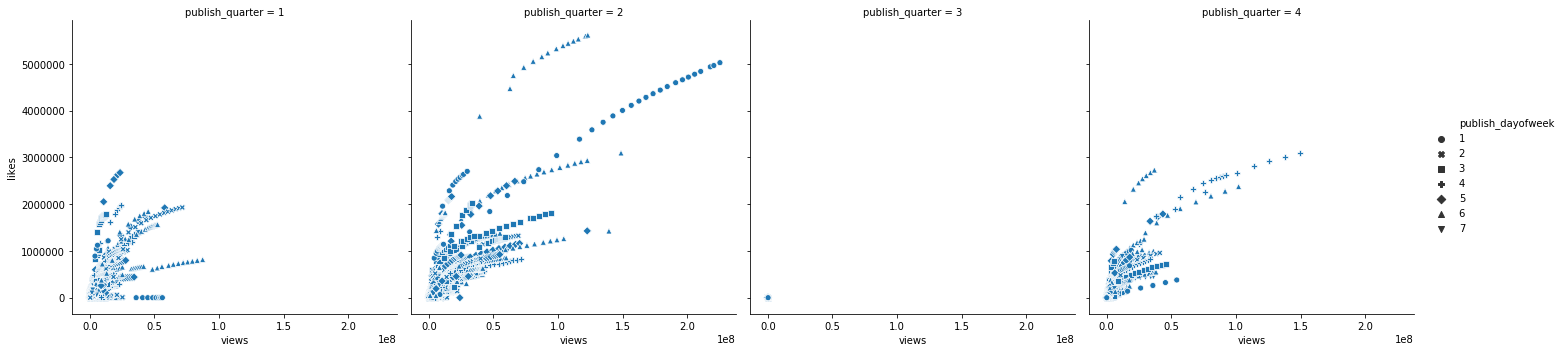

In [0]:
sns.relplot(
    data=df_pd, x="views", y="likes",
    col="publish_quarter", style="publish_dayofweek",
    kind="scatter"
)

In [0]:
df_base_new = sqlContext.createDataFrame(df_pd)

In [0]:
from pyspark.sql.types import *

columns_keep = [
 'publish_year',
 'publish_month',
 'publish_quarter',
 'publish_dayofweek',
 'publish_hour',
 'category_id',
 'views',
 'likes',
 'dislikes',
 'comment_count',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'popular_word'
]

#df_date3.cache().count()
df_base = df_base_new.select(columns_keep)

display(df_base.limit(5))

publish_year,publish_month,publish_quarter,publish_dayofweek,publish_hour,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,popular_word
2017,11,4,2,17,22,748374,57527,2966,15954,0,0,0,0
2017,11,4,2,7,24,2418783,97185,6146,12703,0,0,0,0
2017,11,4,1,19,23,3191434,146033,5339,8181,0,0,0,0
2017,11,4,2,11,24,343168,10172,666,2146,0,0,0,0
2017,11,4,1,18,24,2095731,132235,1989,17518,0,0,0,0


In [0]:
df_base.dtypes

Out[17]: [('publish_year', 'int'),
 ('publish_month', 'int'),
 ('publish_quarter', 'int'),
 ('publish_dayofweek', 'int'),
 ('publish_hour', 'bigint'),
 ('category_id', 'int'),
 ('views', 'int'),
 ('likes', 'int'),
 ('dislikes', 'int'),
 ('comment_count', 'int'),
 ('comments_disabled', 'bigint'),
 ('ratings_disabled', 'bigint'),
 ('video_error_or_removed', 'bigint'),
 ('popular_word', 'bigint')]

In [0]:
df_base1 = df_base.withColumn("comments_disabled", col("comments_disabled").cast("int"))
df_base2 = df_base1.withColumn("ratings_disabled", col("ratings_disabled").cast("int"))
df_base3 = df_base2.withColumn("video_error_or_removed", col("video_error_or_removed").cast("int"))
df_base5 = df_base3.withColumn("publish_hour", col("publish_hour").cast("int"))
df_base4 = df_base5.withColumn("popular_word", col("popular_word").cast("int"))

In [0]:
from pyspark.ml.feature import VectorAssembler

feature_list = []
for col in df_base4.columns:
    if col == 'likes':
        continue
    else:
        feature_list.append(col)
        
vecAssembler = VectorAssembler(inputCols=feature_list, outputCol="features")

In [0]:
(trainDF, testDF) = df_base4.randomSplit([.8, .2], seed=345)

In [0]:
# storing the train-test data in delta table 
trainDeltaPath = "dbfs:/FileStore/shared_uploads/ngaukahang@gmail.com/machine-learning-p/train.delta"
testDeltaPath = "dbfs:/FileStore/shared_uploads/ngaukahang@gmail.com/machine-learning-p/test.delta"

dbutils.fs.rm(trainDeltaPath, True)
dbutils.fs.rm(testDeltaPath, True)

(trainDF
  .write
  .mode("overwrite")
  .format("delta")
  .save(trainDeltaPath)
)

(testDF
  .write
  .mode("overwrite")
  .format("delta")
  .save(testDeltaPath)
)

In [0]:
data_version = 0
trainDelta = spark.read.format("delta").option("versionAsOf", data_version).load(trainDeltaPath)  
testDelta = spark.read.format("delta").option("versionAsOf", data_version).load(testDeltaPath)

In [0]:
import mlflow
import mlflow.spark
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import RFormula

mlflow.set_experiment(f"/Users/ngaukahang@gmail.com/tr-mlflow-lab")
  
mlflow.log_param("label", "likes-all-features")
mlflow.log_param("data_version", data_version)
mlflow.log_param("data_path", trainDeltaPath)    
  
lr = LinearRegression(labelCol="likes", featuresCol="features")
stages = [vecAssembler, lr]
pipeline = Pipeline(stages=stages)
pipelineModel = pipeline.fit(trainDelta)

mlflow.spark.log_model(pipelineModel, "model")

In [0]:
predDF = pipelineModel.transform(testDelta)

display(predDF.select("features", "likes", "prediction").limit(5))

features,likes,prediction
"List(1, 13, List(), List(2018.0, 5.0, 2.0, 1.0, 4.0, 10.0, 2.17750076E8, 335462.0, 509799.0, 0.0, 0.0, 0.0, 0.0))",4934188,5166740.35827937
"List(1, 13, List(), List(2018.0, 5.0, 2.0, 1.0, 4.0, 24.0, 7436025.0, 13015.0, 8029.0, 0.0, 0.0, 0.0, 0.0))",61913,137449.41010975186
"List(1, 13, List(), List(2018.0, 5.0, 2.0, 1.0, 4.0, 24.0, 7655742.0, 13269.0, 8111.0, 0.0, 0.0, 0.0, 0.0))",62655,141145.30877166335
"List(1, 13, List(), List(2018.0, 5.0, 2.0, 1.0, 4.0, 24.0, 8069531.0, 13751.0, 8259.0, 0.0, 0.0, 0.0, 0.0))",64279,148073.77332344558
"List(1, 13, List(), List(2018.0, 5.0, 2.0, 1.0, 4.0, 24.0, 8208371.0, 13884.0, 8288.0, 0.0, 0.0, 0.0, 0.0))",64862,150375.41821895912


In [0]:
regressionEvaluator = RegressionEvaluator(predictionCol="prediction", labelCol="likes", metricName="rmse")

rmse = regressionEvaluator.evaluate(predDF)
r2 = regressionEvaluator.setMetricName("r2").evaluate(predDF)
print(f"RMSE is {rmse}")
print(f"R2 is {r2}")

RMSE is 78468.26225960495
R2 is 0.8758320590091677

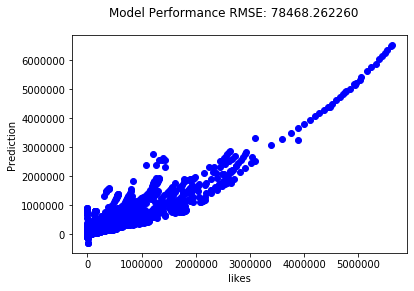

In [0]:
lr_Pred = pipelineModel.transform(df_base4)

lr_Result = lr_Pred.toPandas()

plt.plot(lr_Result.likes, lr_Result.prediction, 'bo')
plt.xlabel('likes')
plt.ylabel('Prediction')
plt.suptitle("Model Performance RMSE: %f" % rmse)
plt.show()

In [0]:
lr_model = pipelineModel.stages[-1]

print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [3364.640779341961,2793.5432437472246,-7266.364985358914,822.0359561138054,191.2086046926416,-1167.2140294133367,0.017657853025813634,-1.9679472358419976,3.853984957833076,-8703.393731719736,-71219.64840237741,-6574.25607026814,-15261.95446781786]
Intercept: -6762039.451017542

In [0]:
features_lr = pd.DataFrame(list(zip(vecAssembler.getInputCols(), lr_model.coefficients)), columns=["feature", "coefficients"])
features_lr.sort_values(by=['coefficients'], ascending=False, inplace=True)
print(features_lr)

feature coefficients
0 publish_year 3364.640779
1 publish_month 2793.543244
3 publish_dayofweek 822.035956
4 publish_hour 191.208605
8 comment_count 3.853985
6 views 0.017658
7 dislikes -1.967947
5 category_id -1167.214029
11 video_error_or_removed -6574.256070
2 publish_quarter -7266.364985
9 comments_disabled -8703.393732
12 popular_word -15261.954468
10 ratings_disabled -71219.648402

In [0]:
### Using PoissonModel from GeneralizedLinearRegression

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.regression import GeneralizedLinearRegression, GBTRegressor
from pyspark.ml.feature import RFormula

rFormula = RFormula(formula="likes ~ .", featuresCol="features", labelCol="likes", handleInvalid="skip")

likes_count =  GeneralizedLinearRegression(family="poisson",
                                           link="log",
                                           maxIter=10,
                                           fitIntercept = True,
                                           labelCol = "likes",
                                           weightCol = "views",
                                           regParam=0.3
                                          )
                                         
pipeline2 = Pipeline(stages = [vecAssembler, likes_count])

model_likes = pipeline2.fit(trainDelta)

In [0]:
predDF2 = model_likes.transform(testDelta)

regressionEvaluator = RegressionEvaluator(predictionCol="prediction", labelCol="likes", metricName="rmse")
rmse = regressionEvaluator.evaluate(predDF2)
r2 = regressionEvaluator.setMetricName("r2").evaluate(predDF2)
print(f"RMSE is {rmse}")
print(f"R2 is {r2}")

RMSE is 269355.7297824893
R2 is -0.4630994477740089

In [0]:
### Perform prediction on using DecisionTreeRegressor Model 

In [0]:
from pyspark.ml.regression import DecisionTreeRegressor

dt = DecisionTreeRegressor(labelCol="likes", maxBins=60)

stages = [vecAssembler, dt]
pipeline = Pipeline(stages=stages)
pipelineModel = pipeline.fit(trainDelta)

dtModel = pipelineModel.stages[-1]
display(dtModel)

treeNode
"{""index"":31,""featureType"":""continuous"",""prediction"":null,""threshold"":59554.5,""categories"":null,""feature"":8,""overflow"":false}"
"{""index"":15,""featureType"":""continuous"",""prediction"":null,""threshold"":11169.0,""categories"":null,""feature"":8,""overflow"":false}"
"{""index"":7,""featureType"":""continuous"",""prediction"":null,""threshold"":4073.5,""categories"":null,""feature"":8,""overflow"":false}"
"{""index"":3,""featureType"":""continuous"",""prediction"":null,""threshold"":759935.5,""categories"":null,""feature"":6,""overflow"":false}"
"{""index"":1,""featureType"":""continuous"",""prediction"":null,""threshold"":717.5,""categories"":null,""feature"":8,""overflow"":false}"
"{""index"":0,""featureType"":null,""prediction"":3627.1569746699965,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":2,""featureType"":null,""prediction"":14793.557685127567,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":5,""featureType"":""continuous"",""prediction"":null,""threshold"":2441.0,""categories"":null,""feature"":8,""overflow"":false}"
"{""index"":4,""featureType"":null,""prediction"":25190.867782909932,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":6,""featureType"":null,""prediction"":41662.62804878049,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"


In [0]:
import pandas as pd

# condunct featureImportances to see which feature affects the result most on prediction 
dtModel.featureImportances
featuresDF = pd.DataFrame(list(zip(vecAssembler.getInputCols(), dtModel.featureImportances)), columns=["feature", "importance"])
featuresDF.sort_values(by=['importance'], ascending=False, inplace=True)
print(featuresDF)

feature importance
8 comment_count 0.632317
6 views 0.195621
3 publish_dayofweek 0.069893
4 publish_hour 0.043563
5 category_id 0.030750
7 dislikes 0.027855
0 publish_year 0.000000
1 publish_month 0.000000
2 publish_quarter 0.000000
9 comments_disabled 0.000000
10 ratings_disabled 0.000000
11 video_error_or_removed 0.000000
12 popular_word 0.000000

In [0]:
predDF = pipelineModel.transform(testDelta)

display(predDF.select("features", "likes", "prediction").orderBy("likes", ascending=False).limit(5))

features,likes,prediction
"List(1, 13, List(), List(2018.0, 5.0, 2.0, 1.0, 4.0, 10.0, 2.17750076E8, 335462.0, 509799.0, 0.0, 0.0, 0.0, 0.0))",4934188,4020492.3
"List(1, 13, List(), List(2018.0, 5.0, 2.0, 6.0, 9.0, 10.0, 7.3463137E7, 156023.0, 1084421.0, 0.0, 0.0, 0.0, 0.0))",4924045,2367141.797101449
"List(1, 13, List(), List(2018.0, 5.0, 2.0, 6.0, 9.0, 10.0, 6.5396157E7, 141966.0, 1040912.0, 0.0, 0.0, 0.0, 0.0))",4750245,2367141.797101449
"List(1, 13, List(), List(2018.0, 5.0, 2.0, 1.0, 4.0, 10.0, 1.4242183E8, 241386.0, 414109.0, 0.0, 0.0, 0.0, 0.0))",3885070,4020492.3
"List(1, 13, List(), List(2018.0, 5.0, 2.0, 6.0, 9.0, 10.0, 3.9349927E7, 72707.0, 692305.0, 0.0, 0.0, 0.0, 0.0))",3880071,2367141.797101449


In [0]:
regressionEvaluator = RegressionEvaluator(predictionCol="prediction", labelCol="likes", metricName="rmse")

rmse = regressionEvaluator.evaluate(predDF)
r2 = regressionEvaluator.setMetricName("r2").evaluate(predDF)
print(f"RMSE is {rmse}")
print(f"R2 is {r2}")

RMSE is 92201.52095038704
R2 is 0.8285657546307985

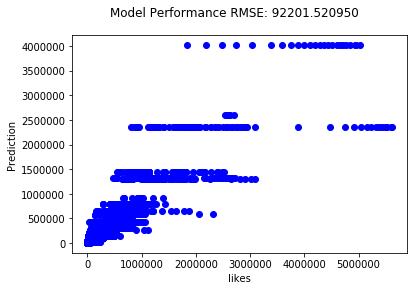

In [0]:
dt_Pred = pipelineModel.transform(df_base4)

dt_Result = dt_Pred.toPandas()

plt.plot(dt_Result.likes, dt_Result.prediction, 'bo')
plt.xlabel('likes')
plt.ylabel('Prediction')
plt.suptitle("Model Performance RMSE: %f" % rmse)
plt.show()

In [0]:
### Perform Hyperparameter Tuning for DecisionTree Model 

In [0]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator

dt = DecisionTreeRegressor(labelCol="likes")
evaluator = RegressionEvaluator(labelCol="likes", predictionCol="prediction")

paramGrid = (ParamGridBuilder()
            .addGrid(dt.maxDepth, [2, 5, 10])
            .addGrid(dt.maxBins, [10, 20, 40, 80, 100])
            .build())

cv = CrossValidator(estimator=dt, evaluator=evaluator, estimatorParamMaps=paramGrid, 
                    numFolds=3, parallelism=4, seed=345)

stagesWithCV = [vecAssembler, cv]
pipeline = Pipeline(stages=stagesWithCV)

pipelineModel = pipeline.fit(trainDelta)

MLlib will automatically track trials in MLflow. After your tuning fit() call has completed, view the MLflow UI to see logged runs.

In [0]:
predDF = pipelineModel.transform(testDelta)

rmse = evaluator.evaluate(predDF)
r2 = evaluator.setMetricName("r2").evaluate(predDF)
print(f"RMSE is {rmse}")
print(f"R2 is {r2}")

RMSE is 51573.68654842105
R2 is 0.9463613594300854

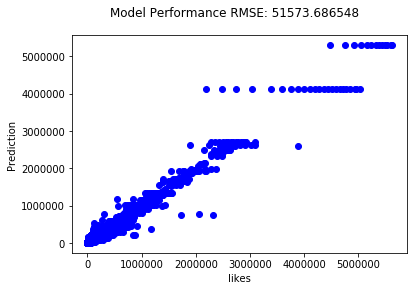

In [0]:
dt_hy_Pred = pipelineModel.transform(df_base4)

dt_hy_Result = dt_hy_Pred.toPandas()

plt.plot(dt_hy_Result.likes, dt_hy_Result.prediction, 'bo')
plt.xlabel('likes')
plt.ylabel('Prediction')
plt.suptitle("Model Performance RMSE: %f" % rmse)
plt.show()

In [0]:
### Perform RandomForrest Regression model on predicting results 

In [0]:
from pyspark.ml.regression import RandomForestRegressor
import numpy as np

rf = RandomForestRegressor(labelCol="likes", featuresCol="features")

pipeline_rf = Pipeline(stages=[vecAssembler, rf])

cvModel_rf = pipeline_rf.fit(trainDelta)

In [0]:
predictions = cvModel_rf.transform(testDelta)

display(predictions.select("features", "likes", "prediction").orderBy("likes", ascending=False).limit(5))

features,likes,prediction
"List(1, 13, List(), List(2018.0, 5.0, 2.0, 1.0, 4.0, 10.0, 2.17750076E8, 335462.0, 509799.0, 0.0, 0.0, 0.0, 0.0))",4934188,2902572.2525343075
"List(1, 13, List(), List(2018.0, 5.0, 2.0, 6.0, 9.0, 10.0, 7.3463137E7, 156023.0, 1084421.0, 0.0, 0.0, 0.0, 0.0))",4924045,1768069.5843140893
"List(1, 13, List(), List(2018.0, 5.0, 2.0, 6.0, 9.0, 10.0, 6.5396157E7, 141966.0, 1040912.0, 0.0, 0.0, 0.0, 0.0))",4750245,1768069.5843140893
"List(1, 13, List(), List(2018.0, 5.0, 2.0, 1.0, 4.0, 10.0, 1.4242183E8, 241386.0, 414109.0, 0.0, 0.0, 0.0, 0.0))",3885070,2902572.2525343075
"List(1, 13, List(), List(2018.0, 5.0, 2.0, 6.0, 9.0, 10.0, 3.9349927E7, 72707.0, 692305.0, 0.0, 0.0, 0.0, 0.0))",3880071,1768069.5843140893


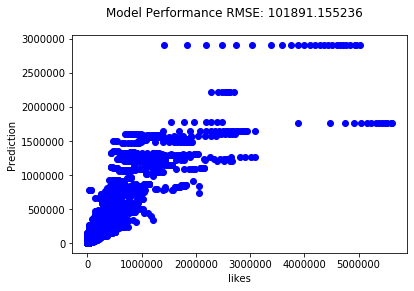

In [0]:
evaluator = RegressionEvaluator(labelCol="likes", predictionCol="prediction", metricName="rmse")

rmse = evaluator.evaluate(predictions)

rfPred = cvModel_rf.transform(df_base4)

rfResult = rfPred.toPandas()

plt.plot(rfResult.likes, rfResult.prediction, 'bo')
plt.xlabel('likes')
plt.ylabel('Prediction')
plt.suptitle("Model Performance RMSE: %f" % rmse)
plt.show()

In [0]:
rmse = evaluator.evaluate(predictions)
r2 = evaluator.setMetricName("r2").evaluate(predictions)
print(f"RMSE is {rmse}")
print(f"R2 is {r2}")

RMSE is 101891.15523644455
R2 is 0.79063967577177

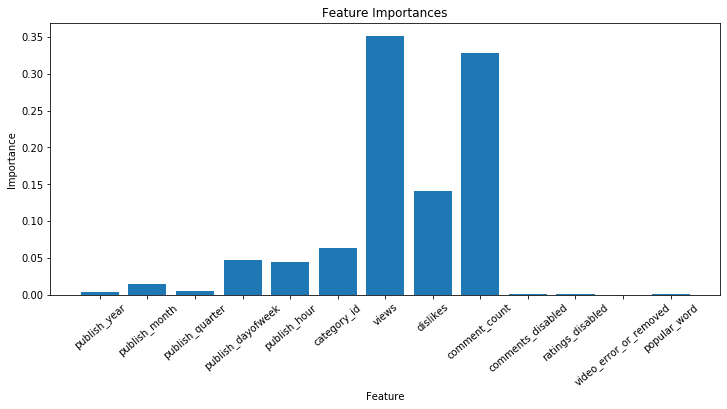

In [0]:
#bestModel = bestPipeline.stages[1]
bestModel = cvModel_rf.stages[1]

importances = bestModel.featureImportances

x_values = list(range(len(importances)))

plt.figure(figsize=(12,5))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation=40)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')

In [0]:
features_rf = pd.DataFrame(list(zip(vecAssembler.getInputCols(), importances)), columns=["feature", "importance"])
features_rf.sort_values(by=['importance'], ascending=False, inplace=True)
print(features_rf)

feature importance
6 views 0.351620
8 comment_count 0.327768
7 dislikes 0.140892
5 category_id 0.063606
3 publish_dayofweek 0.046731
4 publish_hour 0.044798
1 publish_month 0.014333
2 publish_quarter 0.005496
0 publish_year 0.003685
12 popular_word 0.000699
9 comments_disabled 0.000193
10 ratings_disabled 0.000179
11 video_error_or_removed 0.000000

-sandbox
&copy; 2020 Databricks, Inc. All rights reserved.<br/>
Apache, Apache Spark, Spark and the Spark logo are trademarks of the <a href="http://www.apache.org/">Apache Software Foundation</a>.<br/>
<br/>
<a href="https://databricks.com/privacy-policy">Privacy Policy</a> | <a href="https://databricks.com/terms-of-use">Terms of Use</a> | <a href="http://help.databricks.com/">Support</a>